<a href="https://colab.research.google.com/github/FrancescoMonaco/MultiDimMotifDiscovery/blob/main/Motif_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install stumpy
%matplotlib inline
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from numba import cuda

In [3]:
if __name__ == "__main__":
    your_time_series = np.random.rand(10000)
    window_size = 50  # Approximately, how many data points might be found in a pattern
    all_gpu_devices = [device.id for device in cuda.list_devices()]  # Get a list of all available GPU devices

    matrix_profile = stumpy.gpu_stump(your_time_series, m=window_size, device_id=all_gpu_devices)

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 20 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


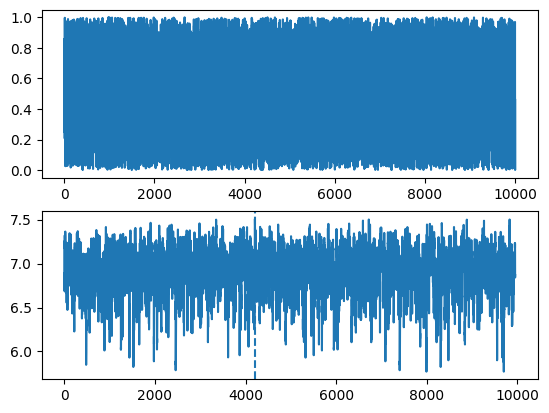

In [16]:
fig, axs = plt.subplots(2)

discord_idx = np.argsort(matrix_profile[:, 0])[-1]
nearest_neighbor_distance = matrix_profile[discord_idx, 0]

axs[0].plot(your_time_series)
rect = Rectangle((discord_idx, 0), 640, 40, facecolor='lightgrey')
axs[1].plot(matrix_profile[:,0])
axs[1].axvline(x=discord_idx, linestyle="dashed")
plt.show()